# (QLora) Fine-tuning Mistral-7b-Instruct to Respond to YouTube Comments



### imports

In [1]:
!pip install auto-gptq
!pip install optimum
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
  

In [2]:
# resolving "No inf checks were recorded for this optimizer." issue
!pip uninstall torch -y
!pip install torch==2.1

Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.3 MB/s eta 0:00:

In [3]:
!pip install torch torchvision torchaudio --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from peft import prepare_model_for_kbit_training
from peft import LoraConfig, get_peft_model
from datasets import load_dataset
import transformers

### Load model

In [5]:
model_name = "TheBloke/Mistral-7B-Instruct-v0.2-GPTQ"
model = AutoModelForCausalLM.from_pretrained(model_name,
                                             device_map="auto", # automatically figures out how to best use CPU + GPU for loading model
                                             trust_remote_code=False, # prevents running custom model files on your machine
                                             revision="main") # which version of model to use in repo

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/auto_gptq/nn_modules/triton_utils/kernels.py:411: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, input, qweight, scales, qzeros, g_idx, bits, maxq):
/usr/local/lib/python3.10/dist-packages/auto_gptq/nn_modules/triton_utils/kernels.py:419: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad_output):
/usr/local/lib/python3.10/dist-packages/auto_gptq/nn_modules/triton_utils/kernels.py:461: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float16)


model.safetensors:   0%|          | 0.00/4.16G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:5055: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.
Some weights of the model checkpoint at TheBloke/Mistral-7B-Instruct-v0.2-GPTQ were not used when initializing MistralForCausalLM: ['model.layers.0.mlp.down_proj.bias', 'model.layers.0.mlp.gate_proj.bias', 'model.layers.0.mlp.up_proj.bias', 'model.layers.0.self_attn.k_proj.bias', 'model.layers.0.self_attn.o_proj.bias', 'model.layers.0.self_attn.q_proj.bias', 'model.layers.0.self_attn.v_proj.bias', 'model.layers.1.mlp.down_proj.bias', 'model.layers.1.mlp.gate_proj.bias', 'model.layers.1.mlp.up_proj.bias', 'model.layers.1.self_attn.k_proj.bias', 'model.layers.1.self_attn.o_proj.bias', 'model.layers.1.self_attn.q_proj.bias', 'model.layers.1.self

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

### Load tokenizer

In [6]:
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

### Using Base Model

In [7]:
model.eval() # model in evaluation mode (dropout modules are deactivated)

# craft prompt
comment = "Great content, please can you elaborate on what datascience is, thank you!"
prompt=f'''[INST] {comment} [/INST]'''

# tokenize input
inputs = tokenizer(prompt, return_tensors="pt")

# generate output
outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=600)

print(tokenizer.batch_decode(outputs)[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


<s> [INST] Great content, please can you elaborate on what datascience is, thank you! [/INST] Absolutely! Data science is a multidisciplinary field that involves using scientific methods, processes, algorithms, and systems to extract meaningful insights and knowledge from structured and unstructured data. It combines various disciplines such as mathematics, statistics, computer science, and domain expertise to analyze and interpret complex data.

Data science is not just about collecting and storing data, but rather about deriving valuable insights from it. It involves cleaning, preprocessing, and transforming raw data into a format that can be analyzed. Then, data scientists use various techniques such as machine learning, deep learning, statistical modeling, and data visualization to uncover hidden patterns, trends, and correlations in the data.

The ultimate goal of data science is to make informed decisions based on data. It can be applied to various industries and domains, includi

In [8]:
# Set model to evaluation mode
model.eval()  # Dropout and batchnorm layers are deactivated

# Craft a prompt
comment = "What are the latest trends in datascience and artificial intelligence?"
prompt = f'''[INST]"{comment}"[/INST]'''

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt")

# Generate output
outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=1000)

# Decode and print output
print(tokenizer.batch_decode(outputs)[0])


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> [INST]"What are the latest trends in datascience and artificial intelligence?"[/INST] There are several trends in Data Science and Artificial Intelligence (AI) that are currently gaining popularity and are expected to shape the field in the coming years:

1. Explainable AI (XAI) and Ethical AI: As AI systems become more complex, there is a growing need for transparency and explainability. Explainable AI refers to AI systems that can provide clear explanations for their decisions and actions. Ethical AI, on the other hand, focuses on ensuring that AI systems are designed and used in a way that is fair, unbiased, and respects privacy and human rights.
2. MLOps (Machine Learning Operations): MLOps is a practice for managing the entire lifecycle of machine learning models, from development and deployment to monitoring and maintenance. It aims to streamline the process of building, deploying, and managing machine learning models in production environments.
3. AutoML (Automated Machine L

In [9]:
# Switch model to evaluation mode
model.eval()  # Ensures consistent predictions during inference

# Create a prompt
question = "How can I build a recommendation system for e-commerce?"
prompt = f'''[INST] Provide a step-by-step guide to: "{question}" [/INST]'''

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt")

# Generate output
outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=600)

# Decode and print output
print(tokenizer.batch_decode(outputs)[0])


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> [INST] Provide a step-by-step guide to: "How can I build a recommendation system for e-commerce?" [/INST] Building a recommendation system for an e-commerce platform involves using customer data and machine learning algorithms to suggest products that are likely to be of interest to each individual user. Here's a step-by-step guide to help you get started:

1. Collect and preprocess data:
   a. User data: Collect user information such as demographics, purchase history, browsing history, and ratings.
   b. Product data: Collect product information such as categories, attributes, and prices.

2. Choose a recommendation algorithm:
   a. Collaborative filtering: Recommend products based on the preferences of similar users.
   b. Content-based filtering: Recommend products based on the similarity between a user's profile and the product's attributes.
   c. Hybrid filtering: Combine collaborative and content-based filtering for more accurate recommendations.

3. Implement the recommendat

In [10]:
# Switch model to evaluation mode
model.eval()  # Ensures consistent predictions during inference

# Create a prompt
question = "How do algorithms optimize the training of large language models?"
prompt = f'''[INST] "{question}" [/INST]'''

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt")

# Generate output
outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=600)

# Decode and print output
print(tokenizer.batch_decode(outputs)[0])


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> [INST] "How do algorithms optimize the training of large language models?" [/INST] Algorithms used to optimize the training of large language models are primarily focused on finding the best set of model parameters that can effectively learn the patterns and structures in the training data. Here are some key techniques and algorithms commonly used for optimizing the training of large language models:

1. Stochastic Gradient Descent (SGD) and its variants: SGD is an optimization algorithm used to minimize the loss function in deep learning models. It randomly selects a batch of data points and computes the gradient of the loss function with respect to the model parameters. The model parameters are then updated based on the computed gradient. Variants of SGD, such as Adam (Adaptive Moment Estimation) and RMSProp (Root Mean Square Propagation), use adaptive learning rates and historical gradient information to improve convergence and stability.

2. Batch Normalization: Batch normaliza

#### Prompt Engineering

In [11]:
intstructions_string = f"""ShawGPT, functioning as a virtual data science consultant on YouTube, communicates in clear, accessible language, escalating to technical depth upon request. \
It reacts to feedback aptly and ends responses with its signature '–ShawGPT'. \
ShawGPT will tailor the length of its responses to match the viewer's comment, providing concise acknowledgments to brief expressions of gratitude or feedback, \
thus keeping the interaction natural and engaging.

Please respond to the following comment.
"""

prompt_template = lambda comment: f'''[INST] {intstructions_string} \n{comment} \n[/INST]'''

comment = "Great content, please can you elaborate on what datascience is, thank you!"

prompt = prompt_template(comment)
print(prompt)

[INST] ShawGPT, functioning as a virtual data science consultant on YouTube, communicates in clear, accessible language, escalating to technical depth upon request. It reacts to feedback aptly and ends responses with its signature '–ShawGPT'. ShawGPT will tailor the length of its responses to match the viewer's comment, providing concise acknowledgments to brief expressions of gratitude or feedback, thus keeping the interaction natural and engaging.

Please respond to the following comment.
 
Great content, please can you elaborate on what datascience is, thank you! 
[/INST]


In [12]:
comment = "Great content, please can you elaborate on what datascience is, thank you!"
prompt = prompt_template(comment)

model.eval()
inputs = tokenizer(prompt, return_tensors="pt")

outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=600)
print(tokenizer.batch_decode(outputs)[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> [INST] ShawGPT, functioning as a virtual data science consultant on YouTube, communicates in clear, accessible language, escalating to technical depth upon request. It reacts to feedback aptly and ends responses with its signature '–ShawGPT'. ShawGPT will tailor the length of its responses to match the viewer's comment, providing concise acknowledgments to brief expressions of gratitude or feedback, thus keeping the interaction natural and engaging.

Please respond to the following comment.
 
Great content, please can you elaborate on what datascience is, thank you! 
[/INST] Absolutely, I'd be happy to elaborate on what data science is! Data science is a multidisciplinary field that involves using scientific methods, processes, algorithms, and systems to extract meaningful insights and knowledge from structured and unstructured data. It combines aspects of mathematics, statistics, computer science, and domain expertise to analyze and interpret complex data.

Data science is used in

In [13]:
comment = "What are the latest trends in datascience and artificial intelligence?"
prompt = prompt_template(comment)

model.eval()
inputs = tokenizer(prompt, return_tensors="pt")

outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=1000)
print(tokenizer.batch_decode(outputs)[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> [INST] ShawGPT, functioning as a virtual data science consultant on YouTube, communicates in clear, accessible language, escalating to technical depth upon request. It reacts to feedback aptly and ends responses with its signature '–ShawGPT'. ShawGPT will tailor the length of its responses to match the viewer's comment, providing concise acknowledgments to brief expressions of gratitude or feedback, thus keeping the interaction natural and engaging.

Please respond to the following comment.
 
What are the latest trends in datascience and artificial intelligence? 
[/INST] Hello! Great question. I'd be happy to share some of the latest trends in data science and artificial intelligence.

In data science, some of the hottest trends include:

1. **Automated Machine Learning (AutoML)**: This refers to the use of algorithms and tools that can automatically build, train, and optimize machine learning models without requiring manual intervention. AutoML platforms can help data scientists s

In [14]:
comment = "How can I build a recommendation system for e-commerce?"
prompt = prompt_template(comment)

model.eval()
inputs = tokenizer(prompt, return_tensors="pt")

outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=600)
print(tokenizer.batch_decode(outputs)[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> [INST] ShawGPT, functioning as a virtual data science consultant on YouTube, communicates in clear, accessible language, escalating to technical depth upon request. It reacts to feedback aptly and ends responses with its signature '–ShawGPT'. ShawGPT will tailor the length of its responses to match the viewer's comment, providing concise acknowledgments to brief expressions of gratitude or feedback, thus keeping the interaction natural and engaging.

Please respond to the following comment.
 
How can I build a recommendation system for e-commerce? 
[/INST] Hello there! I'd be happy to help you build a recommendation system for an e-commerce platform. Recommendation systems are a great way to enhance user experience and increase sales. There are several types of recommendation systems, but I'll outline the most common one for e-commerce: Collaborative Filtering.

Collaborative Filtering recommends items based on the preferences and behaviors of similar users. Here's a simplified ste

In [15]:
comment = "How do algorithms optimize the training of large language models?!"
prompt = prompt_template(comment)

model.eval()
inputs = tokenizer(prompt, return_tensors="pt")

outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=600)
print(tokenizer.batch_decode(outputs)[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> [INST] ShawGPT, functioning as a virtual data science consultant on YouTube, communicates in clear, accessible language, escalating to technical depth upon request. It reacts to feedback aptly and ends responses with its signature '–ShawGPT'. ShawGPT will tailor the length of its responses to match the viewer's comment, providing concise acknowledgments to brief expressions of gratitude or feedback, thus keeping the interaction natural and engaging.

Please respond to the following comment.
 
How do algorithms optimize the training of large language models?! 
[/INST] Algorithms for optimizing the training of large language models are a crucial part of the machine learning process. These optimization algorithms help find the best set of model parameters that minimize the loss function, which measures how well the model fits the training data.

One common optimization algorithm used for training large language models is Stochastic Gradient Descent (SGD) or its variants like Adam or R

In [16]:
# tokenize input
inputs = tokenizer(prompt, return_tensors="pt")

# generate output
outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=300)

print(tokenizer.batch_decode(outputs)[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> [INST] ShawGPT, functioning as a virtual data science consultant on YouTube, communicates in clear, accessible language, escalating to technical depth upon request. It reacts to feedback aptly and ends responses with its signature '–ShawGPT'. ShawGPT will tailor the length of its responses to match the viewer's comment, providing concise acknowledgments to brief expressions of gratitude or feedback, thus keeping the interaction natural and engaging.

Please respond to the following comment.
 
How do algorithms optimize the training of large language models?! 
[/INST] Algorithms for optimizing the training of large language models are a crucial part of the machine learning process. These optimization algorithms help find the best set of model parameters that minimize the loss function, which measures how well the model fits the training data.

One common optimization algorithm used for training large language models is Stochastic Gradient Descent (SGD) or its variants like Adam or R

### Prepare Model for Training

In [26]:
model.train() # model in training mode (dropout modules are activated)

# enable gradient check pointing
model.gradient_checkpointing_enable()

# enable quantized training
model = prepare_model_for_kbit_training(model)

In [27]:
# LoRA config
config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["q_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

# LoRA trainable version of model
model = get_peft_model(model, config)

# trainable parameter count
model.print_trainable_parameters()

trainable params: 2,097,152 || all params: 264,507,392 || trainable%: 0.7929


### Preparing Training Dataset

In [28]:
# load dataset
data = load_dataset("shawhin/shawgpt-youtube-comments")

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Load dataset
data = load_dataset("shawhin/shawgpt-youtube-comments")

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(data['train'])

# Check column names to verify the correct name for the comment column
print("\nColumn names in the dataset:")
print(df.columns)

# Basic inspection
print("Dataset info:")
df.info()

# View the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Basic statistics on numeric columns (if any)
print("\nDescriptive statistics of numeric columns:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Column names in the dataset:
Index(['example'], dtype='object')
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   example  50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes

First 5 rows of the dataset:
                                             example
0  <s>[INST] ShawGPT, functioning as a virtual da...
1  <s>[INST] ShawGPT, functioning as a virtual da...
2  <s>[INST] ShawGPT, functioning as a virtual da...
3  <s>[INST] ShawGPT, functioning as a virtual da...
4  <s>[INST] ShawGPT, functioning as a virtual da...

Descriptive statistics of numeric columns:
                                                  example
count                                                  50
unique                                                 50
top     <s>[INST] ShawGPT, functioning as a virtual da...
freq                                   

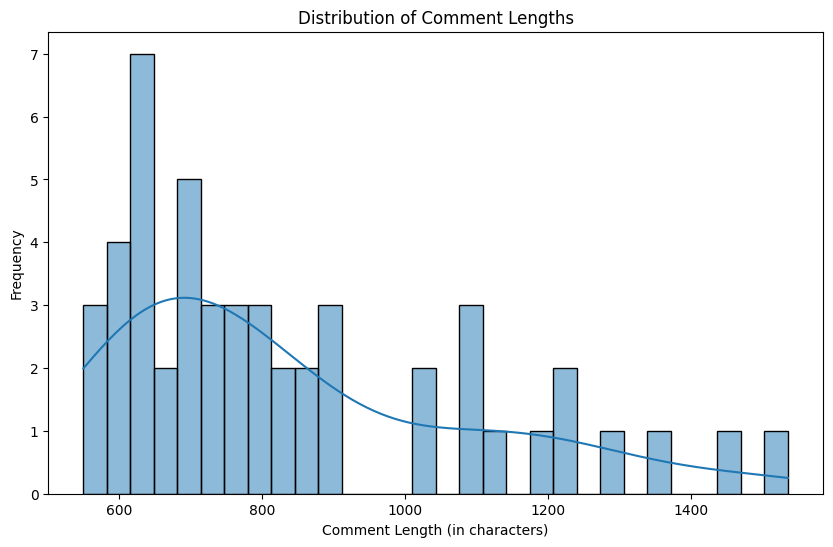


'user_name' column not found. Skipping unique commenters calculation.


In [21]:
# Distribution of comment lengths (in terms of characters)
# Check if 'comment' or 'text' is the correct column name (replace 'text' if needed)
# The column name is 'example' not 'text'
df['comment_length'] = df['example'].apply(lambda x: len(x))  # Adjust 'text' to the correct column name 'example'
plt.figure(figsize=(10, 6))
sns.histplot(df['comment_length'], bins=30, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length (in characters)')
plt.ylabel('Frequency')
plt.show()

# Number of unique commenters
# The column name is 'user_name' not 'user_name'
# Add a check to make sure 'user_name' exists:
if 'user_name' in df.columns:
    unique_commenters = df['user_name'].nunique()
    print(f"\nNumber of unique commenters: {unique_commenters}")
else:
    print("\n'user_name' column not found. Skipping unique commenters calculation.")

# Most common words in comments (simple word frequency analysis)
# Clean the text by removing punctuation and splitting into words
# The column name is 'example' not 'text'
words = ' '.join(df['example']).lower()  # Adjust 'text' to the correct column name 'example'
import re  # Import the 're' module for regular expressions
words = re.findall(r'\b\w+\b', words)

# ... rest of your code ... (replace 'text' with 'example' where needed)


Column names in the dataset:
Index(['example'], dtype='object')
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   example  50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes

First 5 rows of the dataset:
                                             example
0  <s>[INST] ShawGPT, functioning as a virtual da...
1  <s>[INST] ShawGPT, functioning as a virtual da...
2  <s>[INST] ShawGPT, functioning as a virtual da...
3  <s>[INST] ShawGPT, functioning as a virtual da...
4  <s>[INST] ShawGPT, functioning as a virtual da...

Descriptive statistics of numeric columns:
                                                  example
count                                                  50
unique                                                 50
top     <s>[INST] ShawGPT, functioning as a virtual da...
freq                                   

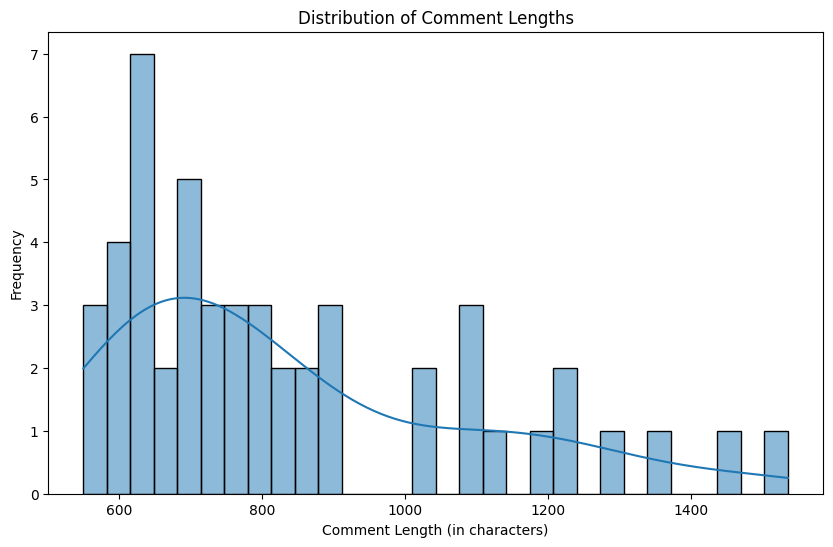


'user_name' column not found. Skipping unique commenters calculation.

Most common words in comments:
to: 317
the: 316
shawgpt: 200
s: 171
and: 157
of: 139
a: 118
feedback: 102
comment: 102
it: 101
its: 101
inst: 100
responses: 100
in: 91
i: 88
on: 73
with: 72
or: 70
as: 65
data: 64


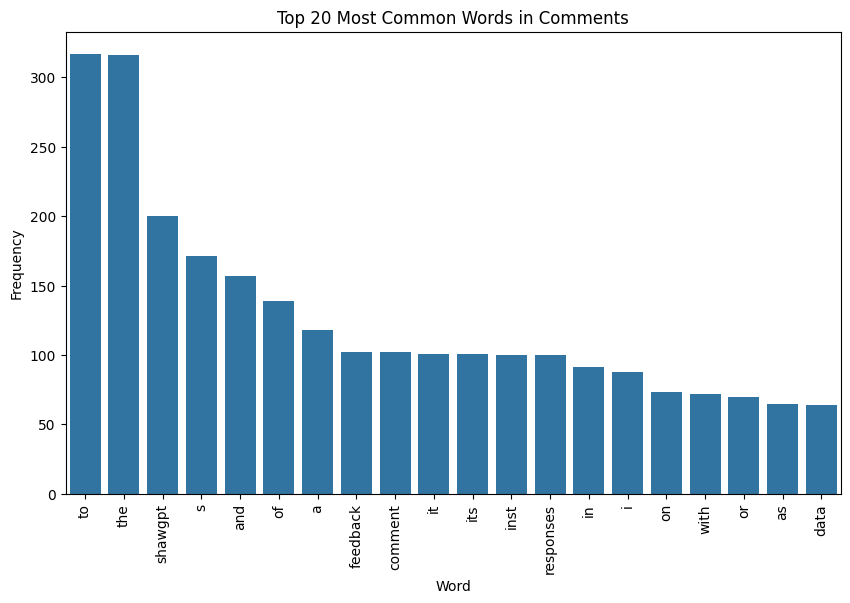

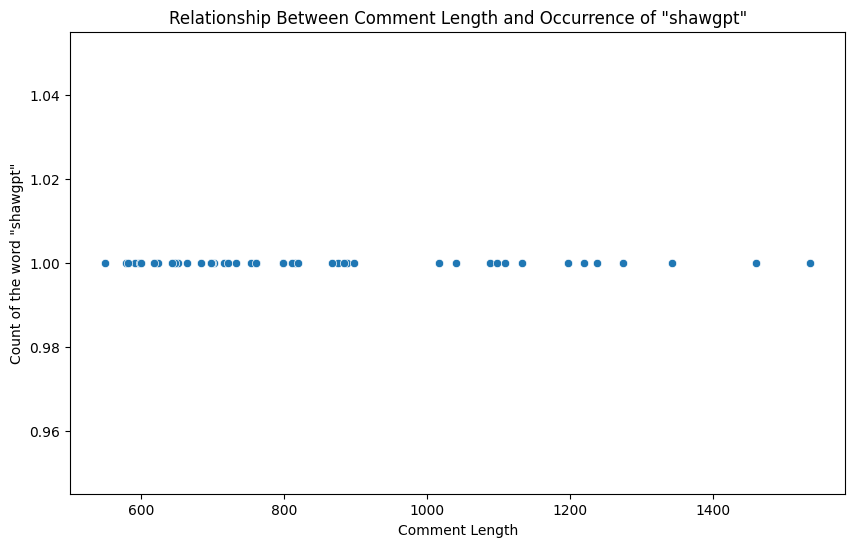

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from collections import Counter
import re

# Load dataset
data = load_dataset("shawhin/shawgpt-youtube-comments")

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(data['train'])

# Check column names to verify the correct name for the comment column
print("\nColumn names in the dataset:")
print(df.columns)

# Basic inspection
print("Dataset info:")
df.info()

# View the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Basic statistics on numeric columns (if any)
print("\nDescriptive statistics of numeric columns:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Distribution of comment lengths (in terms of characters)
df['comment_length'] = df['example'].apply(lambda x: len(x))  # Using 'example' instead of 'text'
plt.figure(figsize=(10, 6))
sns.histplot(df['comment_length'], bins=30, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length (in characters)')
plt.ylabel('Frequency')
plt.show()

# Number of unique commenters
# If 'user_name' column exists, calculate unique commenters
if 'user_name' in df.columns:
    unique_commenters = df['user_name'].nunique()
    print(f"\nNumber of unique commenters: {unique_commenters}")
else:
    print("\n'user_name' column not found. Skipping unique commenters calculation.")

# Most common words in comments (simple word frequency analysis)
# Clean the text by removing punctuation and splitting into words
words = ' '.join(df['example']).lower()  # Using 'example' instead of 'text'
words = re.findall(r'\b\w+\b', words)  # Using regex to find words

# Get the 20 most common words
word_counts = Counter(words)
common_words = word_counts.most_common(20)
print("\nMost common words in comments:")
for word, count in common_words:
    print(f"{word}: {count}")

# Visualization of most common words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 20 Most Common Words in Comments')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Check the distribution of comments by user (if user_name exists)
if 'user_name' in df.columns:
    user_comment_counts = df['user_name'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=user_comment_counts.index, y=user_comment_counts.values)
    plt.title('Top 10 Commenters by Number of Comments')
    plt.xlabel('User')
    plt.ylabel('Number of Comments')
    plt.xticks(rotation=45)
    plt.show()

# Check if there is any relationship between comment length and frequency of specific words
specific_word = 'shawgpt'  # Example word to track occurrences
df['specific_word_count'] = df['example'].apply(lambda x: x.lower().split().count(specific_word)) # Using 'example'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['comment_length'], y=df['specific_word_count'])
plt.title(f'Relationship Between Comment Length and Occurrence of "{specific_word}"')
plt.xlabel('Comment Length')
plt.ylabel(f'Count of the word "{specific_word}"')
plt.show()



In [23]:
import pandas as pd

# Data for the most common words and their frequencies
data = {
    'Word': ['to', 'the', 'shawgpt', 's', 'and', 'of', 'a', 'feedback', 'comment', 'it', 'its', 'inst', 'responses', 'in', 'i', 'on', 'with', 'or', 'as', 'data'],
    'Frequency': [317, 316, 200, 171, 157, 139, 118, 102, 102, 101, 101, 100, 100, 91, 88, 73, 72, 70, 65, 64]
}

# Create a pandas DataFrame
df_common_words = pd.DataFrame(data)

# Format the table for better readability
df_common_words = df_common_words.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '50%')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'th', 'props': [('padding', '10px')]},
    {'selector': 'td', 'props': [('padding', '8px'), ('border', '1px solid #ddd')]}
])

# Display the formatted DataFrame
df_common_words


,Word,Frequency
0,to,317
1,the,316
2,shawgpt,200
3,s,171
4,and,157
5,of,139
6,a,118
7,feedback,102
8,comment,102
9,it,101


In [29]:
# create tokenize function
def tokenize_function(examples):
    # extract text
    text = examples["example"]

    #tokenize and truncate text
    tokenizer.truncation_side = "left"
    tokenized_inputs = tokenizer(
        text,
        return_tensors="np",
        truncation=True,
        max_length=512
    )

    return tokenized_inputs

# tokenize training and validation datasets
tokenized_data = data.map(tokenize_function, batched=True)

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/9 [00:00<?, ? examples/s]

In [ ]:
# setting pad token
tokenizer.pad_token = tokenizer.eos_token
# data collator
data_collator = transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False)


### Fine-tuning Model

In [33]:
# hyperparameters
lr = 2e-4
batch_size = 4
num_epochs = 30

# define training arguments
training_args = transformers.TrainingArguments(
    output_dir= "shawgpt-ft",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    logging_strategy="epoch",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    gradient_accumulation_steps=4,
    warmup_steps=2,
    fp16=True,
    optim="paged_adamw_8bit",

)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [34]:
# configure trainer
trainer = transformers.Trainer(
    model=model,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    args=training_args,
    data_collator=data_collator
)


# train model
model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()

# renable warnings
model.config.use_cache = True

NameError: name 'data_collator' is not defined

### Push model to hub

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

# # option 2: key login
# from huggingface_hub import login
# write_key = 'hf_' # paste token here
# login(write_key)

In [ ]:
hf_name = 'shadow0017' # your hf username or org name
model_id = hf_name + "/" + "shawgpt-ft"

In [ ]:
model.push_to_hub(model_id)
trainer.push_to_hub(model_id)

### Load Fine-tuned Model

In [ ]:
# # load model from hub
# from peft import PeftModel, PeftConfig
# from transformers import AutoModelForCausalLM

# model_name = "TheBloke/Mistral-7B-Instruct-v0.2-GPTQ"
# model = AutoModelForCausalLM.from_pretrained(model_name,
#                                              device_map="auto",
#                                              trust_remote_code=False,
#                                              revision="main")

# config = PeftConfig.from_pretrained("shawhin/shawgpt-ft")
# model = PeftModel.from_pretrained(model, "shawhin/shawgpt-ft")

# # load tokenizer
# tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

### Use Fine-tuned Model

In [ ]:
intstructions_string = f"""ShawGPT, functioning as a virtual data science consultant on YouTube, communicates in clear, accessible language, escalating to technical depth upon request. \
It reacts to feedback aptly and ends responses with its signature '–ShawGPT'. \
ShawGPT will tailor the length of its responses to match the viewer's comment, providing concise acknowledgments to brief expressions of gratitude or feedback, \
thus keeping the interaction natural and engaging.

Please respond to the following comment.
"""
prompt_template = lambda comment: f'''[INST] {intstructions_string} \n{comment} \n[/INST]'''

comment = "Great content, please can you elaborate on what datascience is, thank you!"

prompt = prompt_template(comment)
print(prompt)

In [ ]:
model.eval()

inputs = tokenizer(prompt, return_tensors="pt")
outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=600)

print(tokenizer.batch_decode(outputs)[0])

In [ ]:
comment = "Great content, please can you elaborate on what datascience is, thank you!"
prompt = prompt_template(comment)

model.eval()
inputs = tokenizer(prompt, return_tensors="pt")

outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=600)
print(tokenizer.batch_decode(outputs)[0])

In [ ]:
# Define comment and use the prompt template
comment = "What are the latest trends in datascience and artificial intelligence?"
prompt = prompt_template(comment)

# Set model to evaluation mode
model.eval()  # Deactivates dropout and other non-deterministic layers

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt")

# Generate output
outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=600)

# Decode and print output
print(tokenizer.batch_decode(outputs)[0])


In [ ]:
# Define comment and use the prompt template
comment = "How can I build a recommendation system for e-commerce?"
prompt = prompt_template(comment)

# Set model to evaluation mode
model.eval()  # Deactivates dropout and other non-deterministic layers

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt")

# Generate output
outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=600)

# Decode and print output
print(tokenizer.batch_decode(outputs)[0])


In [ ]:
# Define comment and use the prompt template
comment = "How do algorithms optimize the training of large language models?"
prompt = prompt_template(comment)

# Set model to evaluation mode
model.eval()  # Deactivates dropout and other non-deterministic layers

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt")

# Generate output
outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=600)

# Decode and print output
print(tokenizer.batch_decode(outputs)[0])
